<h1 style="color:blue;">Data Science Assignment: eCommerce Transactions Dataset</h1>


## 1. Exploratory Data Analysis (EDA): Understanding and Analyzing the eCommerce Transactions Dataset


In this analysis, we perform an exploratory data analysis (EDA) on a dataset containing eCommerce transactions, customer details, and product information. The goal is to uncover key business insights that can drive future marketing strategies, product recommendations, and customer retention initiatives.


## importing neccessary libraries

In [143]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## reading csv file

In [144]:
def read_csv_file(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"Successfully loaded {file_path}")
        return data
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None



In [145]:
customers = read_csv_file('Customers.csv')
products = read_csv_file('Products.csv')
transactions = read_csv_file('Transactions.csv')


Successfully loaded Customers.csv
Successfully loaded Products.csv
Successfully loaded Transactions.csv


In [146]:
customers.tail()

,CustomerID,CustomerName,Region,SignupDate
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03
199,C0200,Kelly Cross,Asia,2023-06-11


products.head()

In [147]:

products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


## Data Cleaning


In [148]:

def describe_csv_data(data):


    print("General Information:\n")
    print(data.info())
    
    print("\nDescriptive Statistics:\n")
    print(data.describe())
    
    print("\nMissing Values:\n")
    print(data.isnull().sum())



In [149]:
describe_csv_data(customers)

General Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Descriptive Statistics:

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Missing Values:

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [150]:
describe_csv_data(products)

General Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Descriptive Statistics:

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Missing Values:

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [151]:
describe_csv_data(transactions)

General Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None

Descriptive Statistics:

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.0

##  univarieate analysis on  customers

<Axes: >

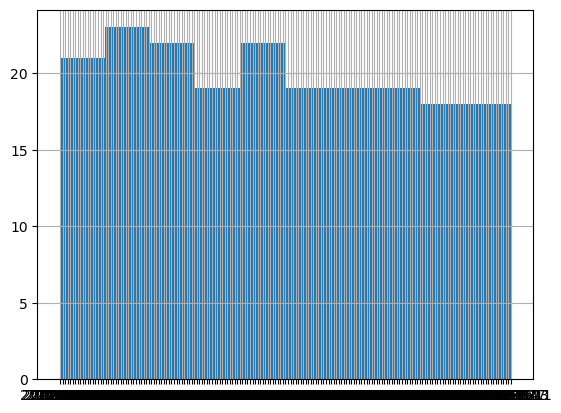

In [152]:
customers['SignupDate'].hist()


<Axes: xlabel='Region'>

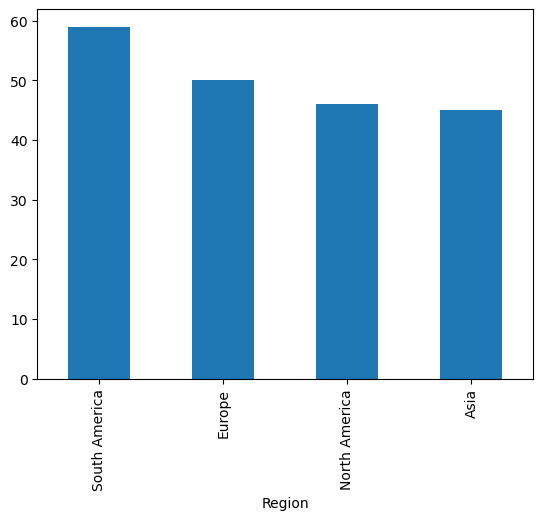

In [153]:
customers['Region'].value_counts().plot(kind='bar')


In [154]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
customers['SignupMonth']= customers['SignupDate'].dt.month

In [155]:
customers

,CustomerID,CustomerName,Region,SignupDate,SignupYear,SignupMonth
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022,2
2,C0003,Michael Rivera,South America,2024-03-07,2024,3
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022,10
4,C0005,Laura Weber,Asia,2022-08-15,2022,8
...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,2022,6
196,C0197,Christina Harvey,Europe,2023-03-21,2023,3
197,C0198,Rebecca Ray,Europe,2022-02-27,2022,2
198,C0199,Andrea Jenkins,Europe,2022-12-03,2022,12


## Customer Distribution by Region


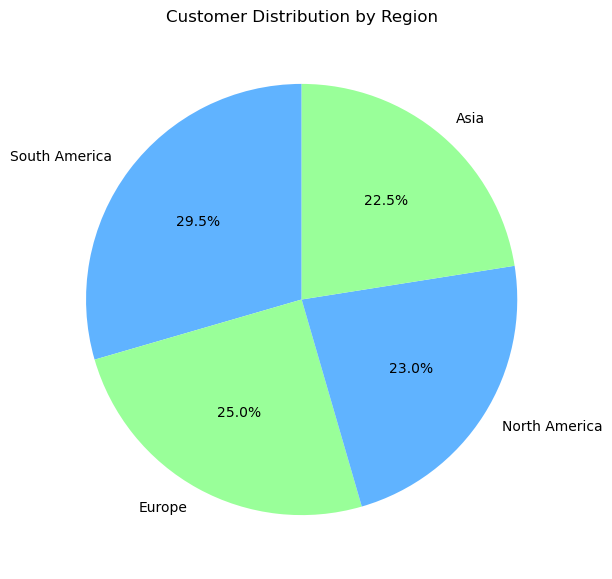

In [157]:
region_counts = customers['Region'].value_counts()


plt.figure(figsize=(7, 7))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=['#60b3ff', '#99ff99'])
plt.title('Customer Distribution by Region')
plt.show()

# Customer Distribution by Region - Insights

# Data for the pie chart
region_counts = {
    "Europe": 25.0,
    "Asia": 22.5,
    "North America": 23.0,
    "South America": 29.5
}

# Insights based on the region distribution
insights = """
### Customer Distribution by Region (Pie Chart) Insights

- **South America** holds the highest customer concentration at **29.5%**, suggesting a strong market presence.
- **Europe** follows with **25%**, showing a significant customer base.
- **North America** and **Asia** have a more balanced but smaller distribution at **23.0%** and **22.5%**, respectively, indicating room for growth in these regions.

#### Key Takeaways:
- The business is well-established in South America, with a need to enhance marketing efforts in other regions.
- Europe is also a strong market, but strategies may need to diversify and target regions like **Asia** and **North America** for future growth.

#### Actionable Insights:
- **South America** and **Europe** are dominant markets, which may suggest the need for regional-specific strategies to capitalize on this strength.
- **Asia** and **North America** could be areas for potential expansion. Focused campaigns or localized offerings could help boost visibility and customer acquisition in these regions.
"""



## customer distrution by timing


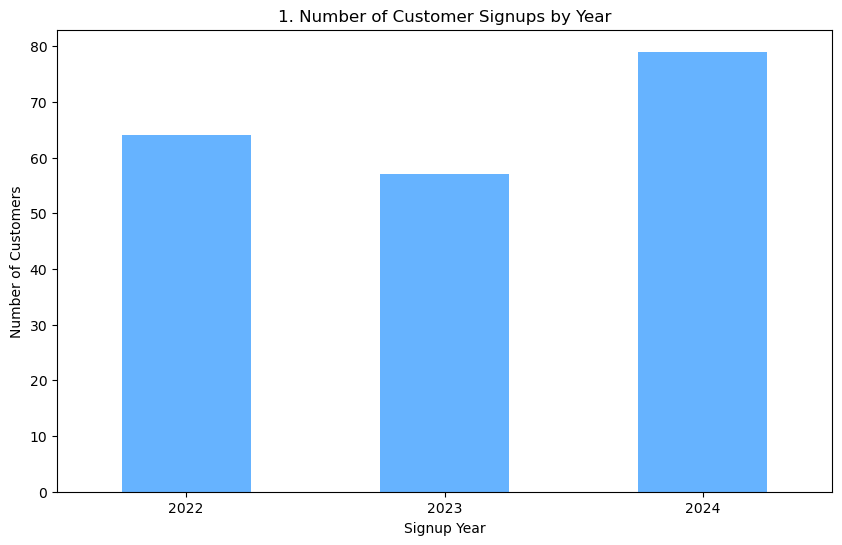

In [158]:



# 1. Signup Trends by Year (Bar Plot)
signup_year_counts = customers['SignupYear'].value_counts().sort_index()

# Plot bar chart for SignupYear
plt.figure(figsize=(10, 6))
signup_year_counts.plot(kind='bar', color='#66b3ff')
plt.title('1. Number of Customer Signups by Year')
plt.xlabel('Signup Year')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()



no of signup in 2024 got high

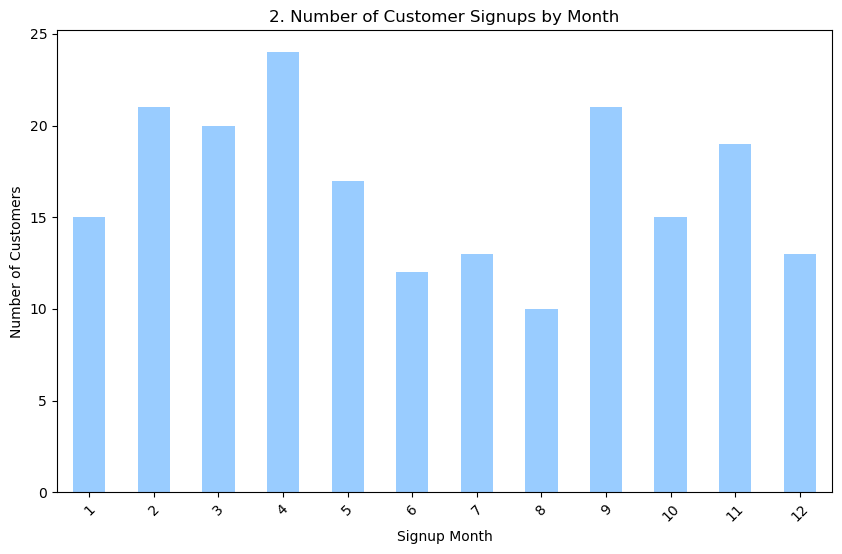

In [159]:
# 2. Signup Trends by Month (Bar Plot)
signup_month_counts = customers['SignupMonth'].value_counts().sort_index()

# Plot bar chart for SignupMonth
plt.figure(figsize=(10, 6))
signup_month_counts.plot(kind='bar', color='#99ccff')
plt.title('2. Number of Customer Signups by Month')
plt.xlabel('Signup Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

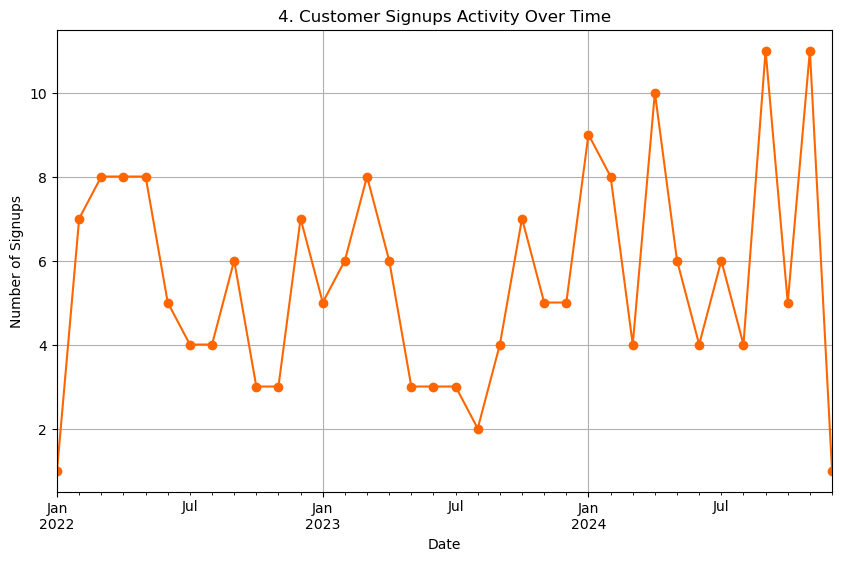

In [160]:




# Plot line chart for signup activity over time
plt.figure(figsize=(10, 6))
monthly_signups.plot(kind='line', color='#ff6600', marker='o')
plt.title('4. Customer Signups Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()

"""To analyze the given observations and recommendations using a Jupiter graph (or interactive plotting), here’s how the data visualization can be described:

1. **Fluctuating Signups**: 
   - A line or bar graph representing customer signups over time would show significant fluctuations. High peaks and deep valleys would indicate periods of both increased and decreased signups.
   - The x-axis represents time, while the y-axis represents the number of signups.
   - The graph’s trend may show varying lengths of periods where signups spike, followed by declines, pointing to periods of instability.

2. **Seasonality**:
   - A line graph with clear downward trends during specific months (e.g., July) would indicate seasonality.
   - The seasonal pattern could be highlighted by shading areas of the graph corresponding to known seasons (e.g., summer, holidays) to identify how these periods correlate with the dip in signups.

3. **Peak Periods**:
   - Marking or annotating periods with sharp peaks will help visually differentiate periods of high signups from the rest of the data.
   - Using different colors for peak periods and including annotations to explain potential contributing factors (e.g., special promotions, new product launches) could clarify reasons behind high signups.

**Business Insights Derived from the Graph**:
- **Uneven Customer Acquisition**: The graph's fluctuating nature would show periods of irregular signups, confirming inconsistent customer acquisition efforts.
- **Seasonal Impact**: The seasonal dip (e.g., July) would suggest the need for strategies that counteract these fluctuations.
- **Leveraging Peak Periods**: High signup periods can be analyzed to replicate the tactics that caused the spikes during quieter times.



## univariate  analysis on  products


In [161]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [162]:
df=products
total_products = df.shape[0]
category_counts = df['Category'].value_counts()
price_summary = df['Price'].describe()
most_expensive = df.loc[df['Price'].idxmax()]
least_expensive = df.loc[df['Price'].idxmin()]


print("### Dataset Analysis ###")
print(f"Total Products: {total_products}\n")
print("Category Distribution:")
print(category_counts, "\n")
print("Price Summary:")
print(price_summary, "\n")
print(f"Most Expensive Product:\n{most_expensive}\n")
print(f"Least Expensive Product:\n{least_expensive}\n")


### Dataset Analysis ###
Total Products: 100

Category Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64 

Price Summary:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64 

Most Expensive Product:
ProductID                  P075
ProductName    TechPro Textbook
Category                  Books
Price                    497.76
Name: 74, dtype: object

Least Expensive Product:
ProductID                      P056
ProductName    SoundWave Smartwatch
Category                Electronics
Price                         16.08
Name: 55, dtype: object



In [163]:

# Convert to DataFrame
df =products
# Basic Dataset Overview
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nDataset Head:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Dataset Description:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Dataset Head:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


C:\Users\hp\anaconda43\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


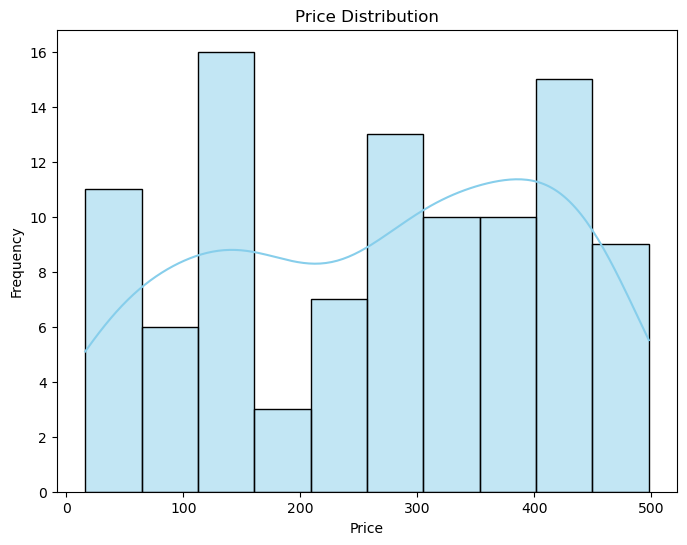

In [164]:

# Univariate Analysis: Price Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=10, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



Category-wise Count

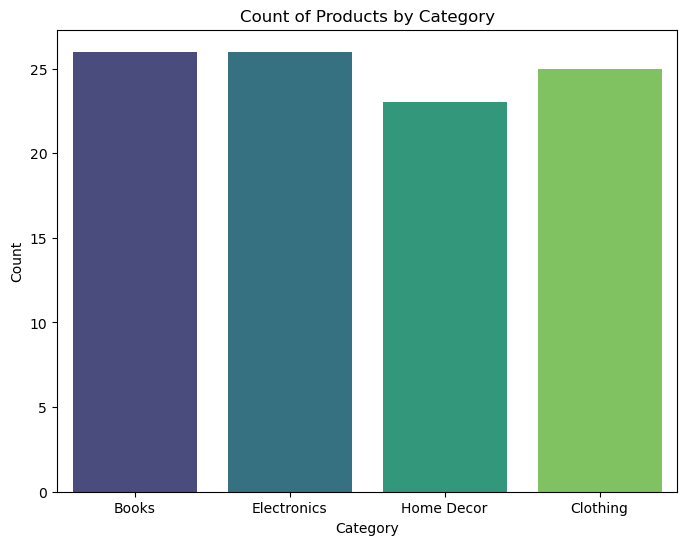

In [165]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Count of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



 Average Price by Category

In [166]:

avg_price_by_category = df.groupby('Category')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price by Category:")
print(avg_price_by_category)



Average Price by Category:
Category
Books          292.212308
Electronics    275.353462
Clothing       263.720000
Home Decor     235.020000
Name: Price, dtype: float64


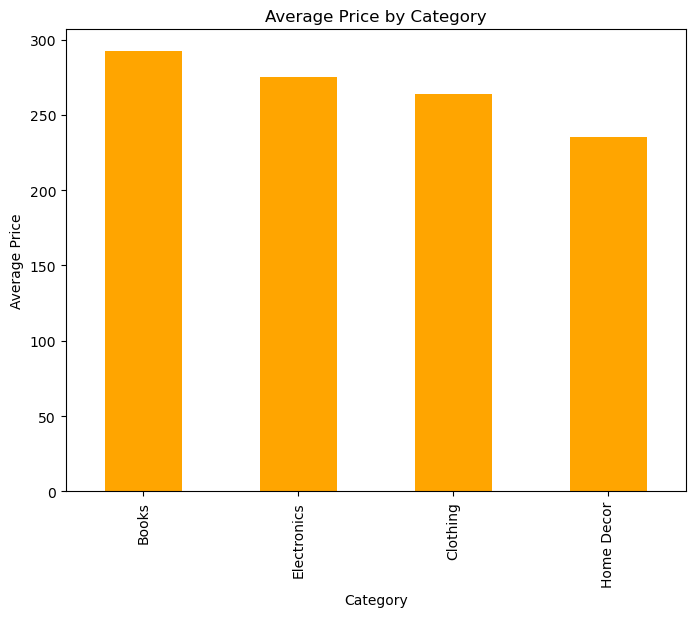

In [167]:

plt.figure(figsize=(8, 6))
avg_price_by_category.plot(kind='bar', color='orange')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()



In [168]:

most_expensive_product = df.loc[df['Price'].idxmax()]
print("\nMost Expensive Product:")
print(most_expensive_product)



Most Expensive Product:
ProductID                  P075
ProductName    TechPro Textbook
Category                  Books
Price                    497.76
Name: 74, dtype: object


In [169]:

cheapest_product = df.loc[df['Price'].idxmin()]
print("\nCheapest Product:")
print(cheapest_product)



Cheapest Product:
ProductID                      P056
ProductName    SoundWave Smartwatch
Category                Electronics
Price                         16.08
Name: 55, dtype: object


C:\Users\hp\anaconda43\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


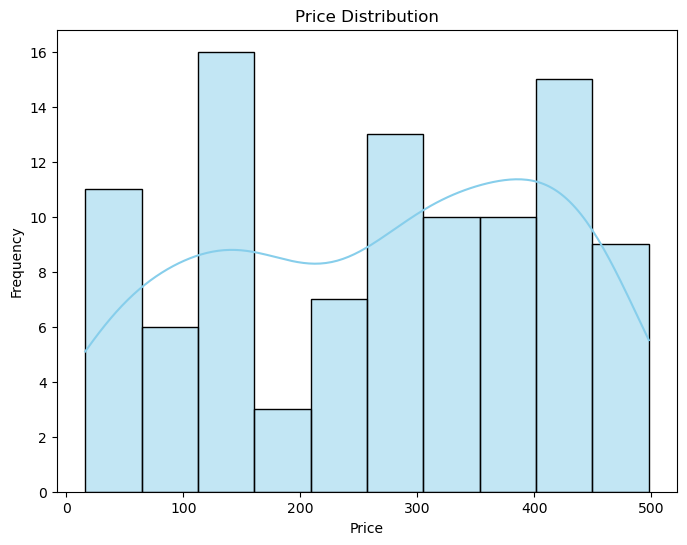

In [170]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=10, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Buvariate analhysis

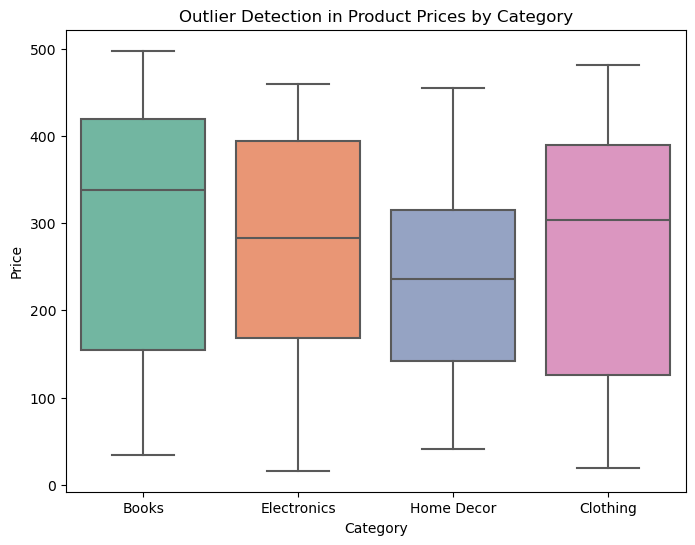

In [171]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Price', data=df, palette='Set2')
plt.title('Outlier Detection in Product Prices by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

## Data Analysis on the transaction

In [172]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


Univariate visualization: Histograms


          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


C:\Users\hp\anaconda43\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


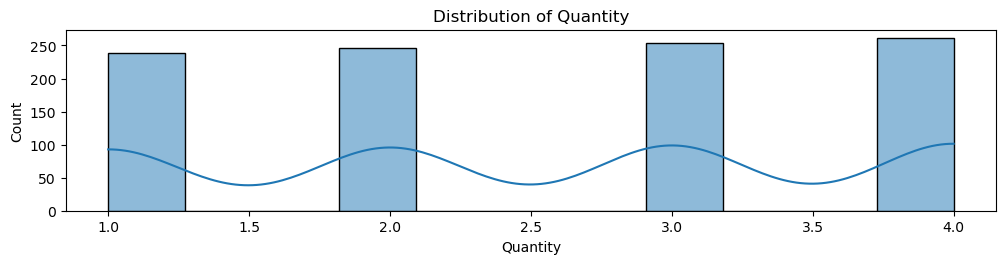

In [185]:
df=transactions

# Summary statistics for each numeric column
print(df[['Quantity', 'TotalValue', 'Price']].describe())

# Univariate visualization: Histograms
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.histplot(df['Quantity'], kde=True)
plt.title('Distribution of Quantity')

df

C:\Users\hp\anaconda43\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of TotalValue')

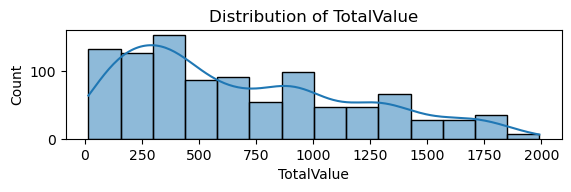

In [174]:
plt.subplot(3, 1, 2)
sns.histplot(df['TotalValue'], kde=True)
plt.title('Distribution of TotalValue')



C:\Users\hp\anaconda43\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


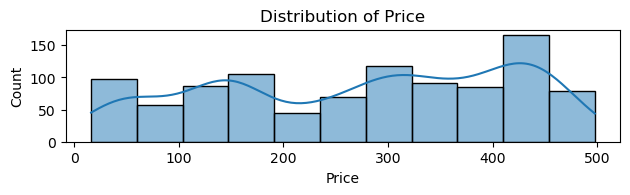

In [175]:
plt.subplot(3, 1, 3)
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Boxplot of Quantity')

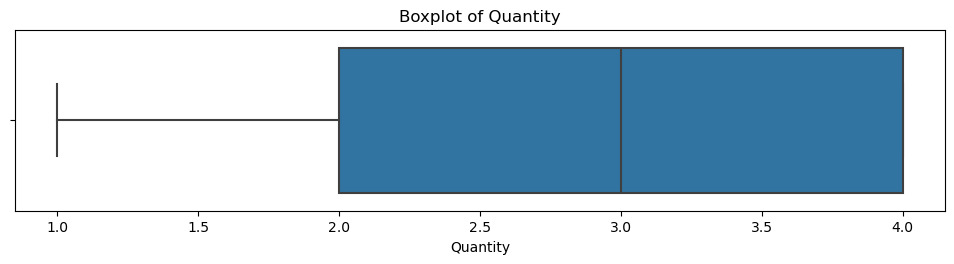

In [176]:

# Boxplots to detect outliers
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')


Text(0.5, 1.0, 'Boxplot of TotalValue')

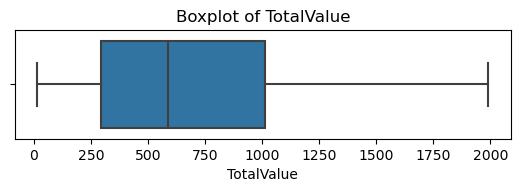

In [177]:

plt.subplot(3, 1, 2)
sns.boxplot(x=df['TotalValue'])
plt.title('Boxplot of TotalValue')



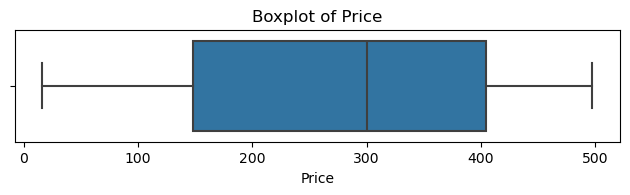

In [178]:
plt.subplot(3, 1, 3)
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')

plt.tight_layout()
plt.show()

bivarate analysis

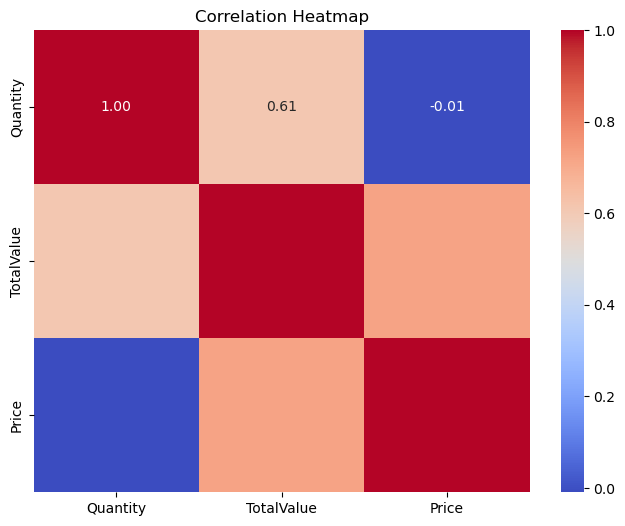

In [179]:
# Correlation heatmap
correlation_matrix = df[['Quantity', 'TotalValue', 'Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


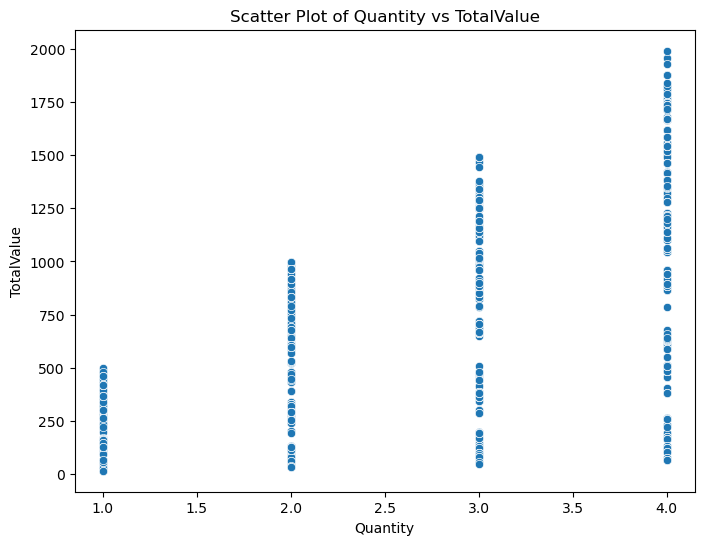

In [180]:
# Scatter plot to visualize the relationship between Quantity and TotalValue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='TotalValue', data=df)
plt.title('Scatter Plot of Quantity vs TotalValue')
plt.show()


  ## Data analysis on merged dataset

In [194]:
merged_df = pd.merge(pd.merge(transactions, customers, on='CustomerID', how='inner'), products, on='ProductID', how='inner')
merged_df = merged_df.rename(columns={'Price_y': 'Price'})
print(merged_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  SignupYear  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03        2022   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04        2024   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04        2024   
3      601.36   300.68  Travis Campbell  South America 2024-04-11        2024   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15        2022   

   SignupMonth                      ProductName     Category   Price  
0           12 

In [195]:
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,SignupYear,SignupMonth,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022,12,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024,9,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024,4,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024,4,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022,3,ComfortLiving Bluetooth Speaker,Electronics,300.68


## exploratory data analysis of the mergerd csv

In [196]:
missing_data = merged_df.isnull().sum()


In [199]:


# Check for missing values
missing_data = merged_df.isnull().sum()

# Summary statistics
summary_stats = merged_df[['Quantity', 'TotalValue', 'Price']].describe()



C:\Users\hp\anaconda43\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Quantity')

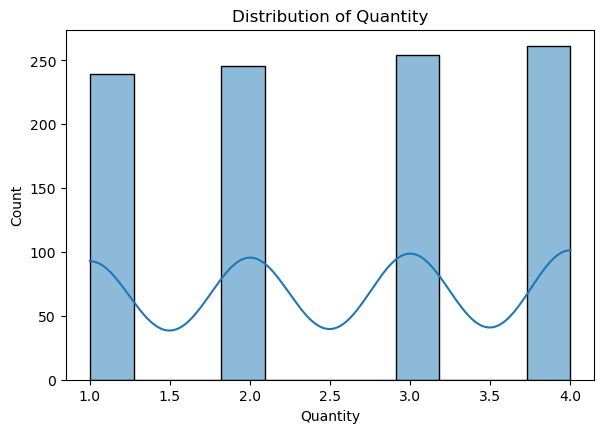

In [200]:
# Univariate visualizations
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(merged_df['Quantity'], kde=True)
plt.title('Distribution of Quantity')



C:\Users\hp\anaconda43\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of TotalValue')

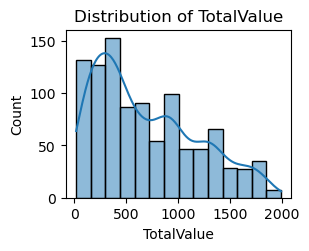

In [201]:
plt.subplot(2, 2, 2)
sns.histplot(merged_df['TotalValue'], kde=True)
plt.title('Distribution of TotalValue')



C:\Users\hp\anaconda43\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


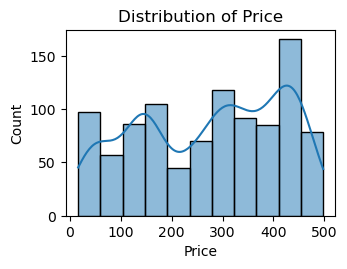

In [202]:
plt.subplot(2, 2, 3)
sns.histplot(merged_df['Price'], kde=True)
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()


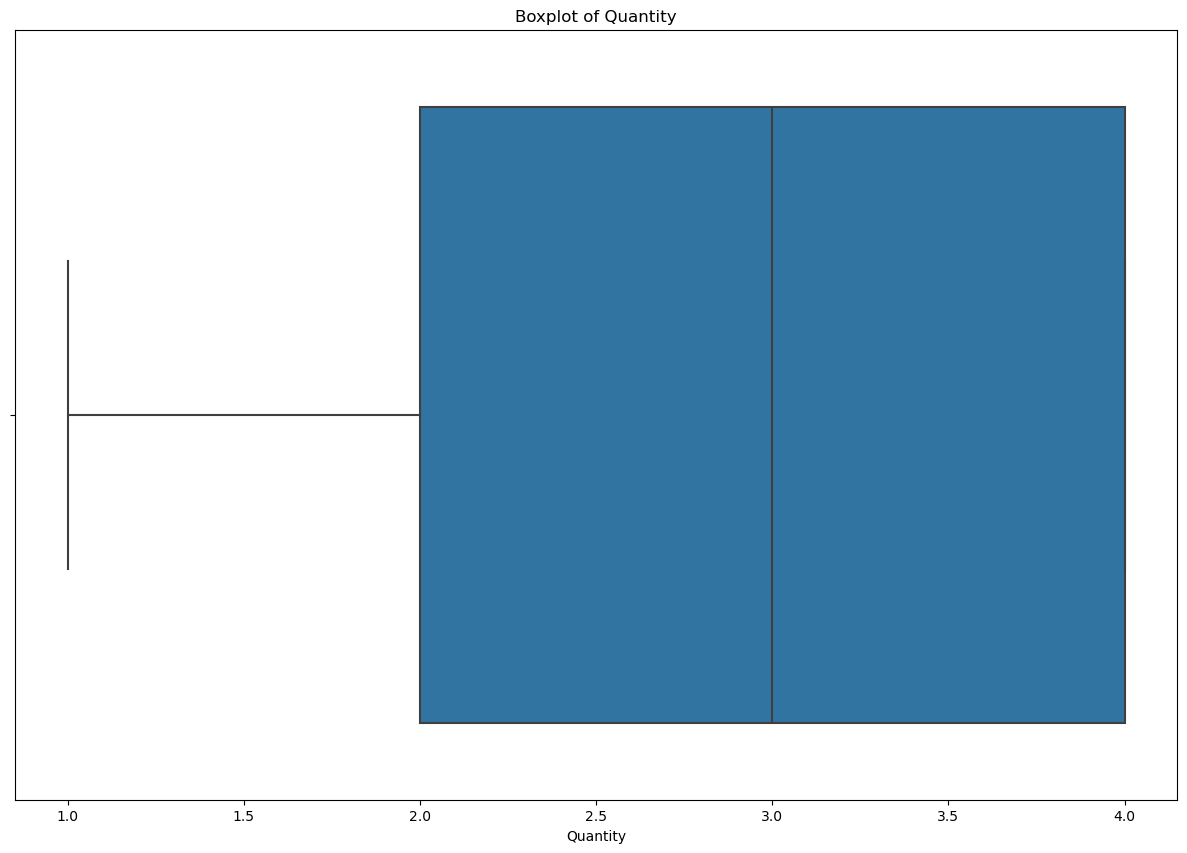

In [203]:

# Boxplot to detect outliers
plt.figure(figsize=(15, 10))
sns.boxplot(x=merged_df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()



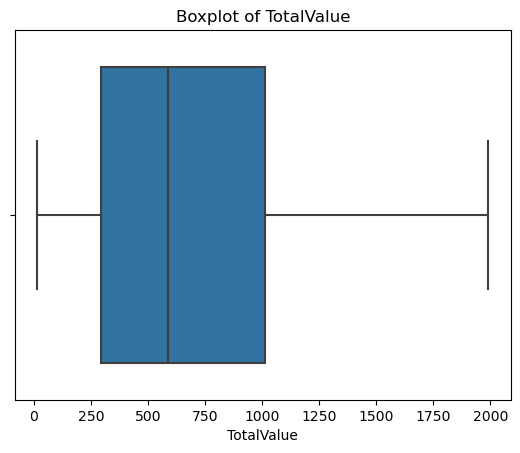

In [204]:
sns.boxplot(x=merged_df['TotalValue'])
plt.title('Boxplot of TotalValue')
plt.show()



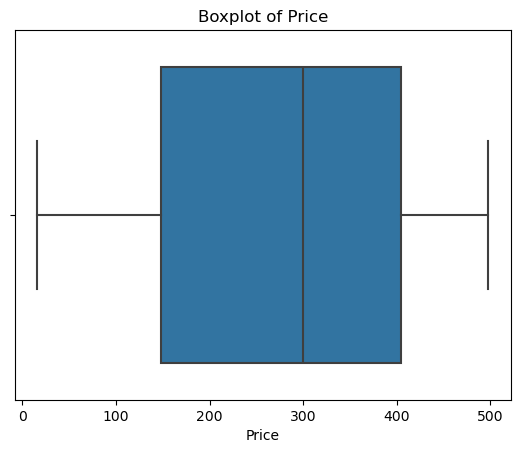

In [205]:
sns.boxplot(x=merged_df['Price'])
plt.title('Boxplot of Price')
plt.show()


Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


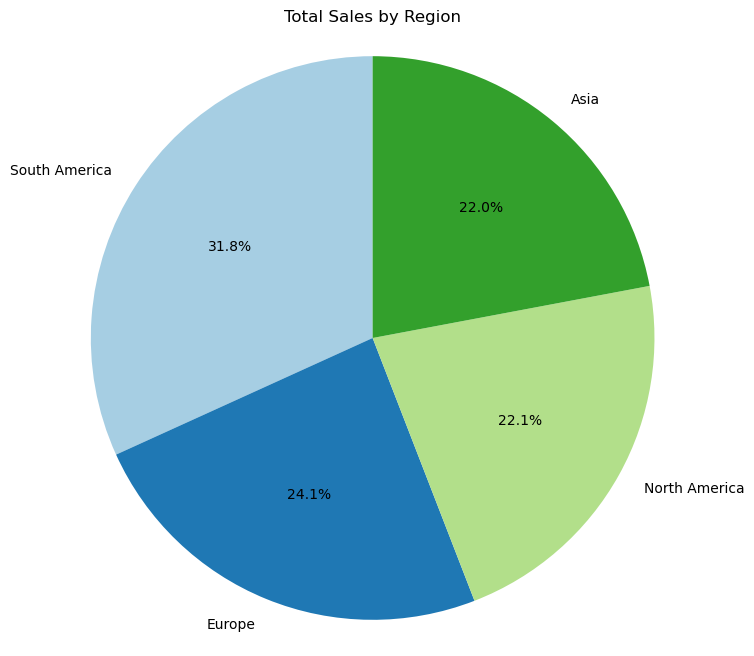

In [211]:
region_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_sales)
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Total Sales by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


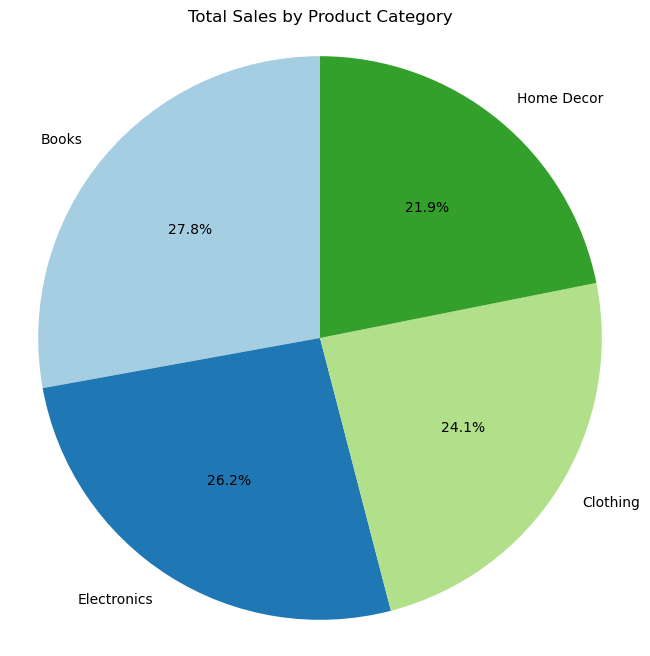

In [212]:
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_sales)
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Total Sales by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

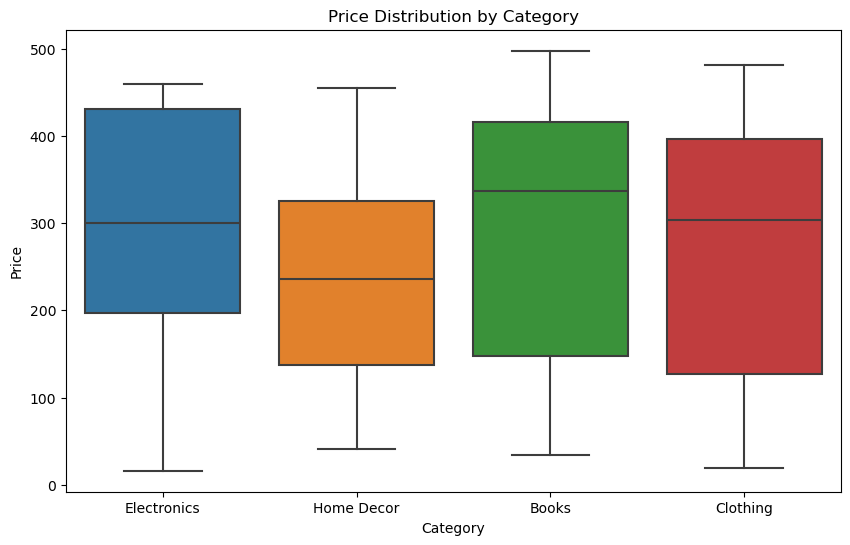

In [208]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=merged_df)
plt.title('Price Distribution by Category')
plt.show()


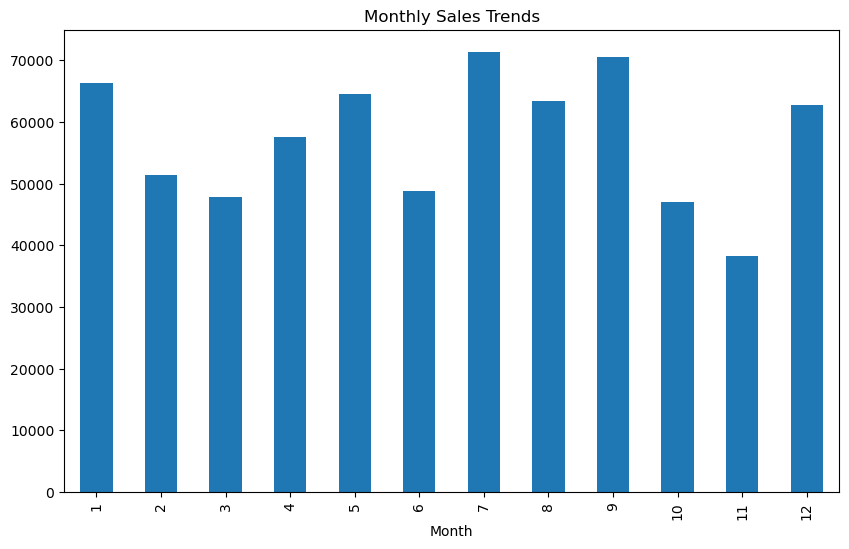

In [209]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['Month'] = merged_df['TransactionDate'].dt.month
monthly_sales = merged_df.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='bar', figsize=(10,6))
plt.title('Monthly Sales Trends')
plt.show()


In [210]:
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
merged_df['SignupYear'] = merged_df['SignupDate'].dt.year
signup_sales = merged_df.groupby('SignupYear')['TotalValue'].sum()
print(signup_sales)


SignupYear
2022    225840.04
2023    196794.01
2024    267361.51
Name: TotalValue, dtype: float64


In [213]:
high_spenders = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_customers = high_spenders.head(10)  # Top 10 high spenders
print(top_customers)


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [214]:
product_performance = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
top_products_by_quantity = product_performance.head(10)  # Top 10 by quantity
print(top_products_by_quantity)


ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [215]:
merged_df['YearSinceSignup'] = (merged_df['TransactionDate'].dt.year - merged_df['SignupDate'].dt.year)
retention_analysis = merged_df.groupby('YearSinceSignup')['TotalValue'].mean()
print(retention_analysis)


YearSinceSignup
-1    612.680000
 0    691.955829
 1    702.564306
 2    677.506586
Name: TotalValue, dtype: float64


In [216]:
price_quantity_correlation = merged_df[['Price', 'Quantity']].corr()
print(price_quantity_correlation)


             Price  Quantity
Price     1.000000 -0.009378
Quantity -0.009378  1.000000


In [217]:
product_sales = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
top_performing_product = product_sales.head(1)  # Top-selling product
print(top_performing_product)


ProductName
ActiveWear Smartwatch    39096.97
Name: TotalValue, dtype: float64


In [219]:
from fpdf import FPDF

# Create PDF document
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Set title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Business Insights Report", ln=True, align='C')

# Add insights section
pdf.ln(10)
pdf.set_font("Arial", size=12)

# Insights
insights = [
    "1. **Product Sales Performance**:\n   - The **ActiveWear Smartwatch** has the highest sales with a total value of $39,096.97. This indicates that electronics-related products may be a key revenue driver.",
    "2. **Top Selling Products by Quantity**:\n   - The **ActiveWear Smartwatch** leads in sales quantity with 100 units sold, followed by **SoundWave Headphones (97 units)** and **HomeSense Desk Lamp (81 units)**. The trend shows that tech gadgets and home accessories are popular items in the market.",
    "3. **Sales by Signup Year**:\n   - **2024** generated the highest total sales value ($267,361.51), followed by **2022** and **2023**. This indicates that there is a significant upward trend in sales, likely driven by newer products or marketing strategies.",
    "4. **Category-Based Revenue**:\n   - The **Books** category is the top performer in total sales, contributing $192,147.47. It suggests that consumers are increasingly investing in reading materials, likely driven by the increased demand for educational and informative content.",
    "5. **Regional Sales Distribution**:\n   - **South America** leads in sales with $219,352.56, followed by **Europe ($166,254.63)** and **North America ($152,313.40)**. This highlights a strong regional demand, especially in South America, which could prompt targeted marketing campaigns for the region."
]

# Add each insight to the PDF
for insight in insights:
    pdf.multi_cell(0, 10, insight)
    pdf.ln(5)

# Save the PDF file
pdf.output("business_insights_report.pdf")


hello
